# **Import Statements**

In [2]:
import sys
root = "C:\\Users\\saman\\OneDrive\\Documents\\GitHub\\Eyelid-Modeling\\"
sys.path.append(root)

from utils.experiment_manager import Experiment
from models.EMG_RNN import EMG_RNN_Wrapper, EMG_RNN
from utils.data_management import Mat2TVT

import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle

%load_ext autoreload
%autoreload 2

torch.cuda.is_available()

True

# **Data Reorganization** <br>


In [3]:
eye_bool = np.asarray([True, True, False, True, True, False, False, False])
electrode_list = ['u1', 'u2', 'u3', 'u4', 't2']
marker_list = ['u1', 'u2', 'u3', 'u4', 'u5']
filepath = root + 'eyeliddata.mat'

train = 0.7
val = 0.2
test = 0.1

reorganizer = Mat2TVT(eye_bool, electrode_list, marker_list, filepath)
_, _, identifier = reorganizer.load_data()
X, y = reorganizer.DMVC_norm()
TVT_dict = reorganizer.TVT_split(train, val, test)

# **Run Experiments**

In [4]:
params = {
    't_win': [0.3],
    't_stride': [10],
    't_lookahead': [50],
    'p_transform': [0.3, 0.4],
    'sigma': [0.5, 0.9],
    'p_mask': [0.2, 0.3],
    'batch_size': [32, 64],
    'learning_rate': [1e-3],
    'dropout': [0.4],
    'RNN_hdim': [4, 8],
    'RNN_depth': [2, 3]
}

experiment = Experiment()
model = EMG_RNN_Wrapper()
best_params = experiment(params, TVT_dict, model, n_trials = 1, epochs = 1)

print("Best Params:\n_________________________________________________________________________________________________________")
for key, value in best_params.items():
    print('    {}: {}'.format(key, value))

[I 2025-03-13 00:38:44,705] A new study created in memory with name: no-name-50e632a7-8f5d-4dd7-9484-2b06954b676a


Epoch 1
-------------------------------


[I 2025-03-13 00:38:47,592] Trial 0 finished with value: 1.437131643295288 and parameters: {'t_win': 0.3, 't_stride': 10, 't_lookahead': 50, 'p_transform': 0.4, 'sigma': 0.9, 'p_mask': 0.3, 'batch_size': 64, 'learning_rate': 0.001, 'dropout': 0.4, 'RNN_hdim': 8, 'RNN_depth': 2}. Best is trial 0 with value: 1.437131643295288.


Validation Error: 
 Max Marker Error: 8391.2%, Avg Marker Error: 203.3%, Avg loss: 1.437132 

Done!
Best Params:
_________________________________________________________________________________________________________
    t_win: 0.3
    t_stride: 10
    t_lookahead: 50
    p_transform: 0.4
    sigma: 0.9
    p_mask: 0.3
    batch_size: 64
    learning_rate: 0.001
    dropout: 0.4
    RNN_hdim: 8
    RNN_depth: 2


# **Training Model with Best Params**

In [5]:
metrics = experiment.run_experiment(best_params, TVT_dict, model, epochs = 2, patience = 5)

'''
Saving Model, Training Metrics, and Best Params
'''
with open("training_metrics.pickle", "wb") as file:
    pickle.dump(metrics, file)
with open("best_params.pickle", "wb") as file:
    pickle.dump(best_params, file)

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 10004.8%, Avg Marker Error: 174.1%, Avg loss: 1.311756 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 9108.5%, Avg Marker Error: 165.8%, Avg loss: 1.253594 

Done!


# **Plotting Loss Metrics**

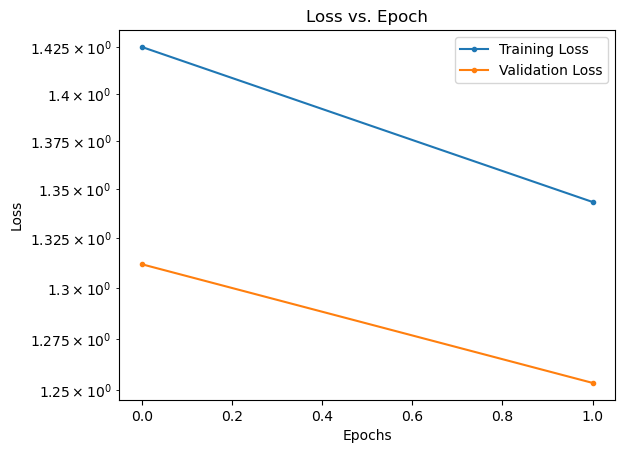

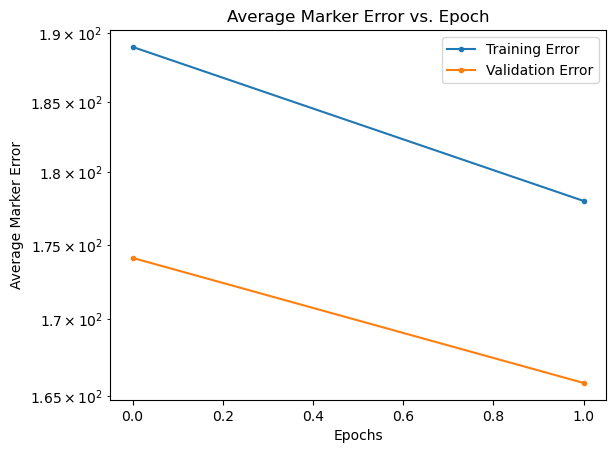

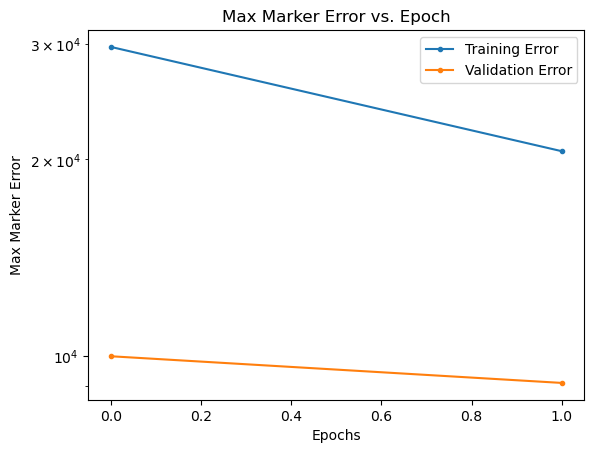

In [6]:
plt.plot(metrics['Training Loss'], label = 'Training Loss', marker = '.')
plt.plot(metrics['Validation Loss'], label = 'Validation Loss', marker = '.')
plt.yscale('log')
plt.title('Loss vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(metrics['Training Avg Marker Error'], label = 'Training Error', marker = '.')
plt.plot(metrics['Validation Avg Marker Error'], label = 'Validation Error', marker = '.')
plt.yscale('log')
plt.title('Average Marker Error vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Average Marker Error')
plt.legend()
plt.show()

plt.plot(metrics['Training Max Marker Error'], label = 'Training Error', marker = '.')
plt.plot(metrics['Validation Max Marker Error'], label = 'Validation Error', marker = '.')
plt.yscale('log')
plt.title('Max Marker Error vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Max Marker Error')
plt.legend()
plt.show()